In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Input, Lambda
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras import regularizers
from keras.models import Model
import itertools
import os
import shutil
import random
from glob import glob
import matplotlib.pyplot as plt
import warnings
import PIL
import cv2
%matplotlib inline
import seaborn as sns

In [5]:
train_path='/content/gdrive/MyDrive/GWAR_Project/Augmented'
test_path='/content/gdrive/MyDrive/GWAR_Project/Valid'

In [10]:
IMAGE_SIZE = 224

In [12]:
train_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=train_path, target_size=(IMAGE_SIZE, IMAGE_SIZE), classes=['Apple_Healthy', 'Apple_Unhealthy_1', 'Apple_Unhealthy_2', 'Corn_Healthy', 'Corn_Unhealthy_1', 'Corn_Unhealthy_2', 'Tomato_Healthy', 'Tomato_Unhealthy_1', 'Tomato_Unhealthy_2' ], batch_size=32)

test_batches = ImageDataGenerator(rescale=1./255) \
    .flow_from_directory(directory=test_path, target_size=(IMAGE_SIZE, IMAGE_SIZE), classes=['Apple_Healthy', 'Apple_Unhealthy_1', 'Apple_Unhealthy_2', 'Corn_Healthy', 'Corn_Unhealthy_1', 'Corn_Unhealthy_2', 'Tomato_Healthy', 'Tomato_Unhealthy_1', 'Tomato_Unhealthy_2'], batch_size=32, shuffle=False)


Found 6426 images belonging to 9 classes.
Found 801 images belonging to 9 classes.


In [13]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))

9406464/9406464 [==============================] - 0s 0us/step


In [14]:
for layer in base_model.layers:
    layer.trainable = False

In [27]:
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
prediction = Dense(len(train_batches.class_indices), activation='softmax')(x)

In [28]:
model = Model(inputs=base_model.input, outputs=prediction)

In [29]:
model.compile(optimizer=Adagrad(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [31]:
folders = glob('/content/gdrive/MyDrive/GWAR_Project/Augmented/*')
(folders)

['/content/gdrive/MyDrive/GWAR_Project/Augmented/Apple_Healthy',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Apple_Unhealthy_2',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Corn_Healthy',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Corn_Unhealthy_2',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Tomato_Healthy',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Tomato_Unhealthy_1',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Tomato_Unhealthy_2',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Apple_Unhealthy_1',
 '/content/gdrive/MyDrive/GWAR_Project/Augmented/Corn_Unhealthy_1']

In [32]:
history = model.fit(
    x=train_batches,
    validation_data=test_batches,
    epochs=10,
    steps_per_epoch=len(train_batches),
    validation_steps=len(test_batches)
)

Epoch 1/10
201/201 [==============================] - 432s 2s/step - loss: 0.4241 - accuracy: 0.8683 - val_loss: 0.1208 - val_accuracy: 0.9675
Epoch 2/10
201/201 [==============================] - 429s 2s/step - loss: 0.0919 - accuracy: 0.9799 - val_loss: 0.0755 - val_accuracy: 0.9838
Epoch 3/10
201/201 [==============================] - 426s 2s/step - loss: 0.0536 - accuracy: 0.9919 - val_loss: 0.0616 - val_accuracy: 0.9900
Epoch 4/10
201/201 [==============================] - 423s 2s/step - loss: 0.0363 - accuracy: 0.9967 - val_loss: 0.0525 - val_accuracy: 0.9888
Epoch 5/10
201/201 [==============================] - 427s 2s/step - loss: 0.0275 - accuracy: 0.9988 - val_loss: 0.0448 - val_accuracy: 0.9900
Epoch 6/10
201/201 [==============================] - 431s 2s/step - loss: 0.0218 - accuracy: 0.9991 - val_loss: 0.0418 - val_accuracy: 0.9913
Epoch 7/10
201/201 [==============================] - 432s 2s/step - loss: 0.0180 - accuracy: 0.9995 - val_loss: 0.0393 - val_accuracy: 0.9888

In [33]:
score = model.evaluate(test_batches,verbose=0)
print('Test Loss: ',score[0])
print('Test accuracy: ',score[1])
print(score)

Test Loss:  0.0342213436961174
Test accuracy:  0.9887640476226807
[0.0342213436961174, 0.9887640476226807]


In [37]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


26/26 [==============================] - 37s 1s/step


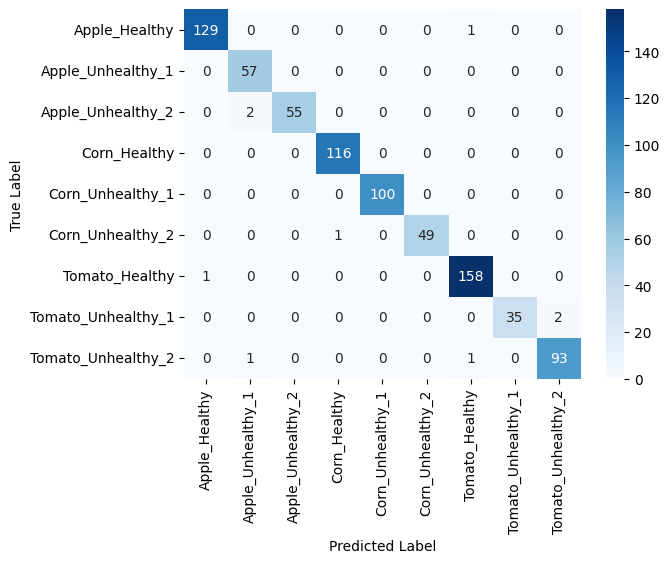

                    precision    recall  f1-score   support

     Apple_Healthy       0.99      0.99      0.99       130
 Apple_Unhealthy_1       0.95      1.00      0.97        57
 Apple_Unhealthy_2       1.00      0.96      0.98        57
      Corn_Healthy       0.99      1.00      1.00       116
  Corn_Unhealthy_1       1.00      1.00      1.00       100
  Corn_Unhealthy_2       1.00      0.98      0.99        50
    Tomato_Healthy       0.99      0.99      0.99       159
Tomato_Unhealthy_1       1.00      0.95      0.97        37
Tomato_Unhealthy_2       0.98      0.98      0.98        95

          accuracy                           0.99       801
         macro avg       0.99      0.98      0.99       801
      weighted avg       0.99      0.99      0.99       801



In [35]:
predictions = model.predict(test_batches, steps=len(test_batches))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_batches.classes
class_labels = list(test_batches.class_indices.keys())

conf_mat = confusion_matrix(true_classes, predicted_classes)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


print(classification_report(true_classes, predicted_classes, target_names=class_labels))

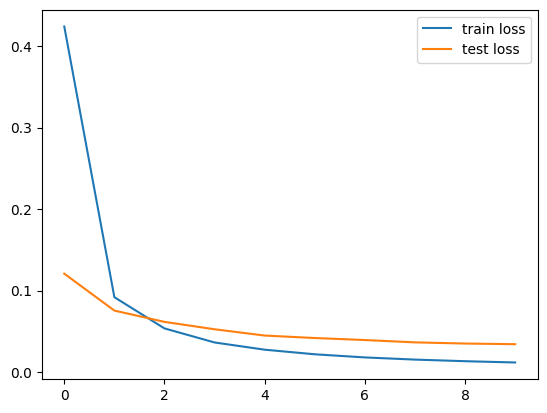

<Figure size 640x480 with 0 Axes>

In [38]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('Train_Test_loss')

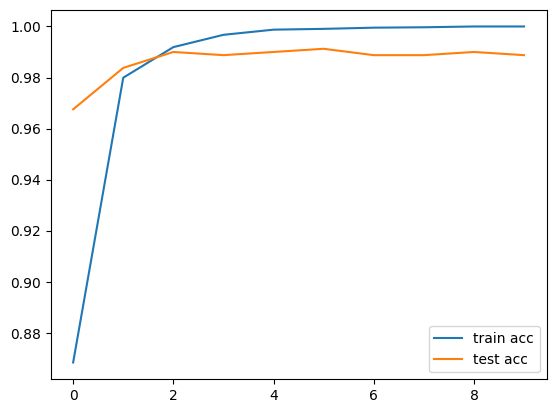

<Figure size 640x480 with 0 Axes>

In [39]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()
plt.savefig('Train_Test_acc')

In [40]:
model.save('/content/gdrive/MyDrive/Gwar_models/Mobilenet_model_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
model.save('/content/gdrive/MyDrive/Gwar_models/Mobilenet_good_model.keras')